## <center> Response Surface Methode <br> am Beispiel Bieranalytik <center>
#    <center> von Eike Ahlers <center>

# <center>Gliederung<center>

- Grundlagen
- Vorgehensweise
- Auswertung
- Übung


# <center>Grundlagen<center>

# <center>Was ist die Response Surface Methode<center>

- Sammlung statischer und mathematischer Methoden zur Optimierung von Systemen
- Die Auswirkung y = g(x1,...,xn) +ε, wobei n = Anzahl der Einflussfaktoren, 
    <br> ε = unbekannter Fehler



# <center>Ziele der RSM<center>

- Prozessoptimierung
- beste Kombination von Variablen mit dem größten Response
- möglichst wenige Experimente

Idee der RSM

- Aus Experimente weites vorgehen erschließen
- Resultat der Modelbildung ist eine Gleichung


Nachteil One-Faktor-At-A-Time

- RSM = Änderung mehrerer Faktoren pro Experiment
- COST = Änderungng eines Faktors pro Experiment

<center><video data-autoplay src="test.mp4"></video><center>

# <center>Vorgehensweise<center>
<center><img src="RSM1.png"  height="400" width="800"><center>


Der optimale Betriebsbereich y befindet sich im roten Bereich. Es wird versucht den Prozess immer näher in deisen Bereich zu bewegen.
Zunächst befindet sich der Prozess weit weg und wird mittels faktorielle Experimente in Richtung des optimane Responses gelenkt.
Befindet sich der Prozess in der Nähe vom Optimum werden genauere Methoden angewendet. 
So wird der Rahmen der Untersuchungen immer weiter in Richtung des Optimums geleitet.

# <center>Beispiel Screening (Popcorn)<center>


-2 Faktoren: (Ölsorte und Zeit)

<center><video data-autoplay src="SPlot.mp4"></video><center>

-> Nur Faktor A ist relevant. B kann vernachlässigt werden
Folie runter für Rechenbeispiel

Registered S3 method overwritten by 'DoE.base':
  method           from       
  factorize.factor conf.design



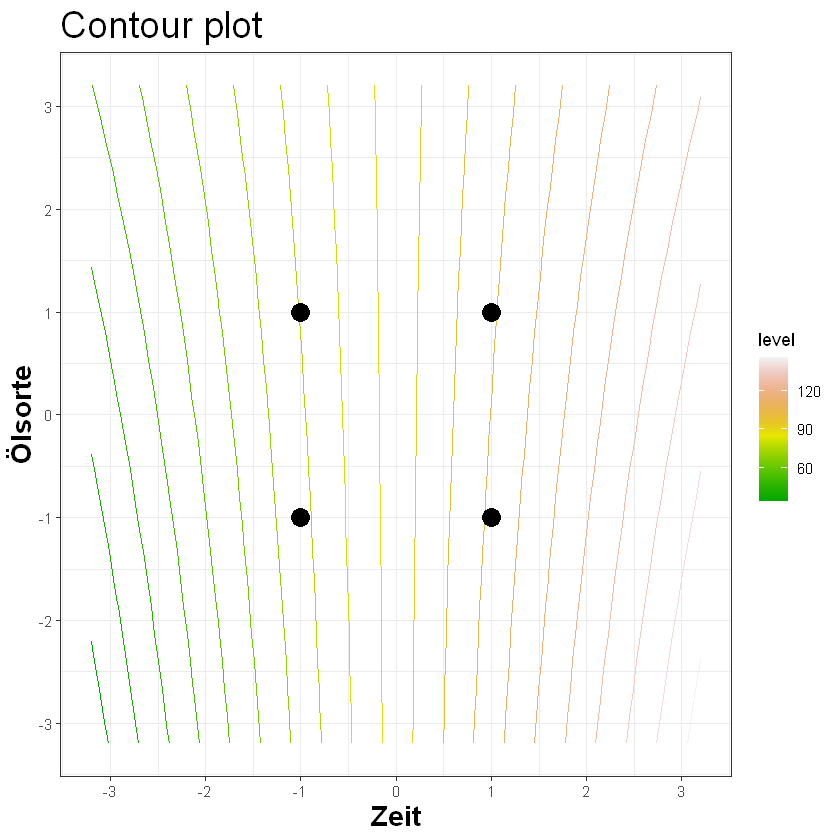

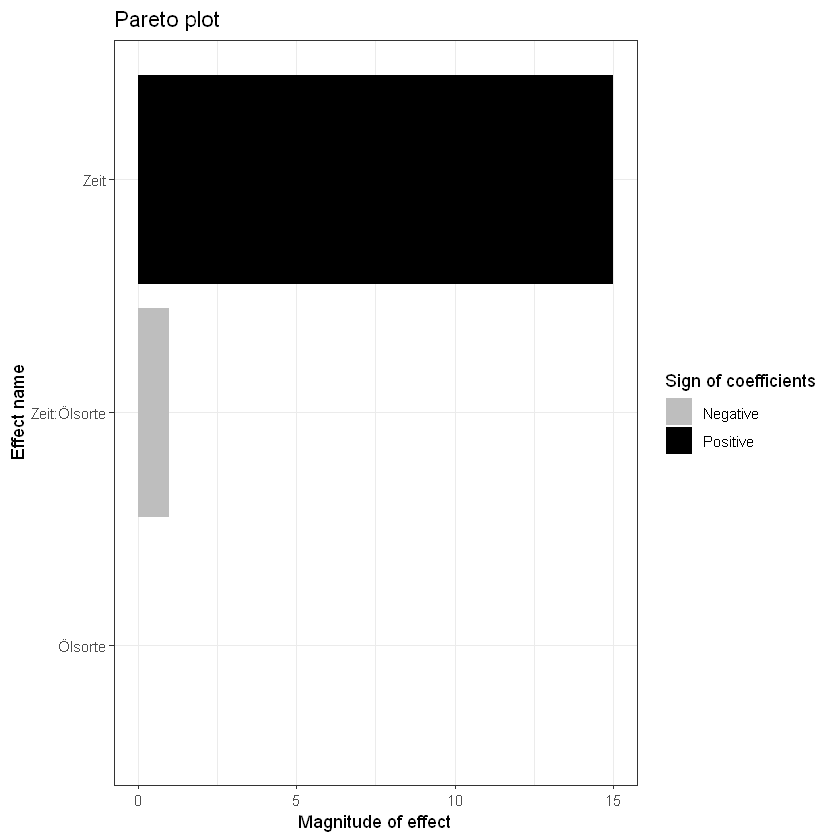

In [1]:
library(pid)
Zeit    <- c(-1, +1, -1, +1) # Code Einheiten für A
Ölsorte    <- c(-1, -1, +1, +1) # Code Einheiten für B
Response    <- c(74, 106, 76, 104) # Auswirkung: unten links,unten rechts,oben links,oben rechts

model   <- lm(Response ~ Zeit * Ölsorte ) # Haupteffekte mit Interaktionen

Konturdiagramm = contourPlot(model)
ParetoPlot = paretoPlot(model)

Konturplot

<center><video data-autoplay src="CPlot.mp4"></video><center>

## <center>Teil 1: Anweden des first order models an einer zufälligen Stelle<center>
#    <center> Zunächst laden wir die Daten<center>

In [2]:
library(rsm,readr)
data <- read.csv("TempZeit.csv", sep=" ") #Laden der Datei mit den Experimenten und Ergebnissen
names(data)[1] <- "x1" #nicht beachten
data # zeige die Daten



x1,x2,Zeit,Temperatur,Y
<int>,<int>,<int>,<int>,<dbl>
-1,-1,30,150,39.3
1,-1,40,150,40.9
-1,1,30,160,40.0
1,1,40,160,41.5
0,0,35,155,40.3
0,0,35,155,40.5
0,0,35,155,40.7
0,0,35,155,40.2
0,0,35,155,40.6



Call:
rsm(formula = Y ~ FO(x1, x2), data = RSM)

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 40.444444   0.057288 705.9869 5.451e-16 ***
x1           0.775000   0.085932   9.0188  0.000104 ***
x2           0.325000   0.085932   3.7821  0.009158 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.941,	Adjusted R-squared:  0.9213 
F-statistic: 47.82 on 2 and 6 DF,  p-value: 0.0002057

Analysis of Variance Table

Response: Y
            Df  Sum Sq Mean Sq F value    Pr(>F)
FO(x1, x2)   2 2.82500 1.41250 47.8213 0.0002057
Residuals    6 0.17722 0.02954                  
Lack of fit  2 0.00522 0.00261  0.0607 0.9419341
Pure error   4 0.17200 0.04300                  

Direction of steepest ascent (at radius 1):
       x1        x2 
0.9221944 0.3867267 

Corresponding increment in original units:
    Time     Temp 
4.610972 1.933633 


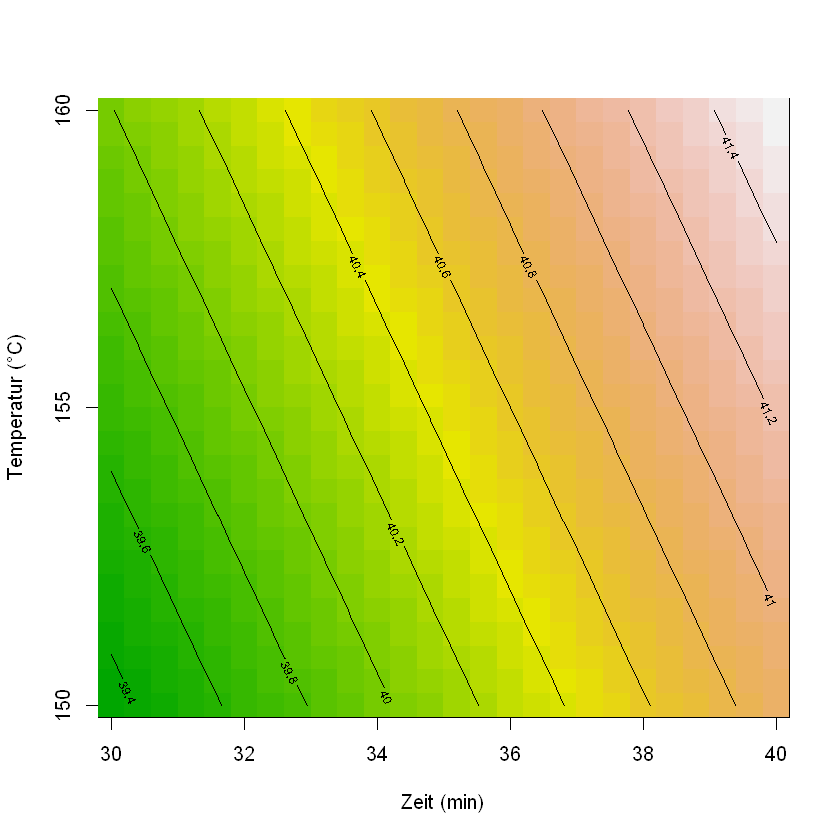

In [3]:
RSM <- as.coded.data(data, 
              x1 ~ (Time-35)/5,
              x2 ~ (Temp-155)/5) # Daten in Coded Units umwandelt. Dies braucht R zum berechnen
model <- rsm(Y ~ FO(x1, x2), data = RSM) # FO = first order model # TWI Interaktionen
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(150,160,2),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

## <center>Teil 2: Anweden des first order models am neuen Hochpunkt<center>
#    <center> Zunächst laden wir die Daten<center>

In [4]:
library(rsm,readr)
data <- read.csv("TempZeit2.csv", sep=" ") #Laden der Datei mit den Experimenten und Ergebnissen
names(data)[1] <- "x1" #nicht beachten
data # zeige die Daten

x1,x2,Time,Temp,Y
<int>,<int>,<int>,<int>,<dbl>
-1,-1,80,170,76.5
1,-1,90,170,78.0
-1,1,80,180,77.0
1,1,90,180,79.5
0,0,85,175,79.9
0,0,85,175,80.3
0,0,85,175,80.0
0,0,85,175,79.7
0,0,85,175,79.8


## <center>Nachdem die Daten geladen sind können wir das Modell durch R berechnen lassen<center>


Call:
rsm(formula = Y ~ FO(x1, x2) + TWI(x1, x2), data = RSM)

            Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 78.96667    0.49148 160.6702 1.772e-10 ***
x1           1.00000    0.73722   1.3564    0.2330    
x2           0.50000    0.73722   0.6782    0.5277    
x1:x2        0.25000    0.73722   0.3391    0.7483    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.3257,	Adjusted R-squared:  -0.07891 
F-statistic: 0.805 on 3 and 5 DF,  p-value: 0.5426

Analysis of Variance Table

Response: Y
            Df Sum Sq Mean Sq F value    Pr(>F)
FO(x1, x2)   2  5.000   2.500   1.150 0.3882680
TWI(x1, x2)  1  0.250   0.250   0.115 0.7483056
Residuals    5 10.870   2.174                  
Lack of fit  1 10.658  10.658 201.094 0.0001436
Pure error   4  0.212   0.053                  

Stationary point of response surface:
x1 x2 
-2 -4 

Stationary point in original units:
Time Temp 
  75  155 

Eigenanalysis:
eigen() decomposition
$va

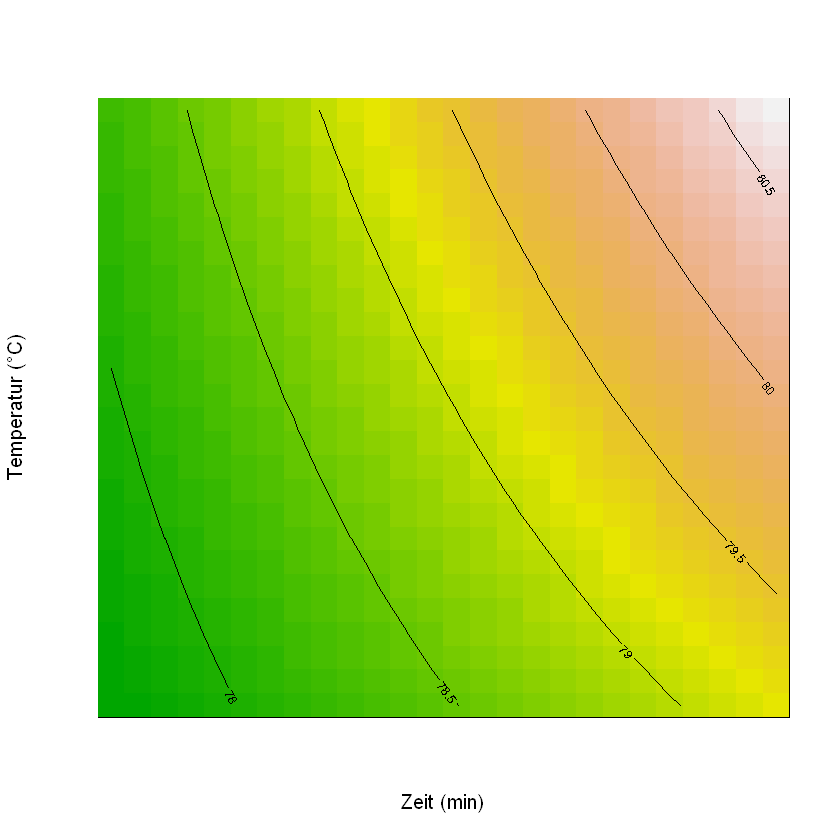

In [5]:
RSM <- as.coded.data(data, 
              x1 ~ (Time-85)/5,
              x2 ~ (Temp-175)/5) # Daten in Coded Units umwandelt. Dies braucht R zum berechnen
model <- rsm(Y ~ FO(x1, x2)+TWI(x1,x2), data = RSM) # FO = first order model # TWI Interaktionen
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(150,160,2),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

## <center>Teil 3 Testen des Central Composite Designs<center>
# <center>Zunächst laden wir die Daten<center>

In [6]:
library(rsm,readr)
data <- read.csv("CenterCD.csv", sep=" ") #Laden der Datei mit den Experimenten und Ergebnissen
names(data)[1] <- "x1" #nicht beachten
data # zeige die Daten

x1,x2,Time,Temp,Y,visc,MW
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
-1.000,-1.000,80.00,170.00,76.5,62,2940
-1.000,1.000,80.00,180.00,77.0,60,3470
1.000,-1.000,90.00,170.00,78.0,66,3680
1.000,1.000,90.00,180.00,79.5,59,3890
0.000,0.000,85.00,175.00,79.9,72,3480
0.000,0.000,85.00,175.00,80.3,69,3200
0.000,0.000,85.00,175.00,80.0,68,3410
0.000,0.000,85.00,175.00,79.7,70,3290
0.000,0.000,85.00,175.00,79.8,71,3500


## <center>Nachdem die Daten geladen sind können wir das Central Composite Design durch R berechnen lassen.<center>
    
## <center>Hierbei wird der Befehl PQ(x1,x2) verwendet. Es steht für den quadratischen Anteil<center>


Call:
rsm(formula = Y ~ FO(x1, x2) + PQ(x1, x2), data = RSM)

            Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 79.93995    0.13660 585.2155 < 2.2e-16 ***
x1           0.99505    0.10800   9.2135 1.559e-05 ***
x2           0.51520    0.10800   4.7704  0.001408 ** 
x1^2        -1.37645    0.11583 -11.8831 2.310e-06 ***
x2^2        -1.00134    0.11583  -8.6447 2.489e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.974,	Adjusted R-squared:  0.961 
F-statistic: 75.02 on 4 and 8 DF,  p-value: 2.226e-06

Analysis of Variance Table

Response: Y
            Df  Sum Sq Mean Sq F value    Pr(>F)
FO(x1, x2)   2 10.0430  5.0215 53.8227 2.290e-05
PQ(x1, x2)   2 17.9537  8.9769 96.2186 2.538e-06
Residuals    8  0.7464  0.0933                  
Lack of fit  4  0.5344  0.1336  2.5206    0.1962
Pure error   4  0.2120  0.0530                  

Stationary point of response surface:
       x1        x2 
0.3614555 0.2572577 

Stationary p

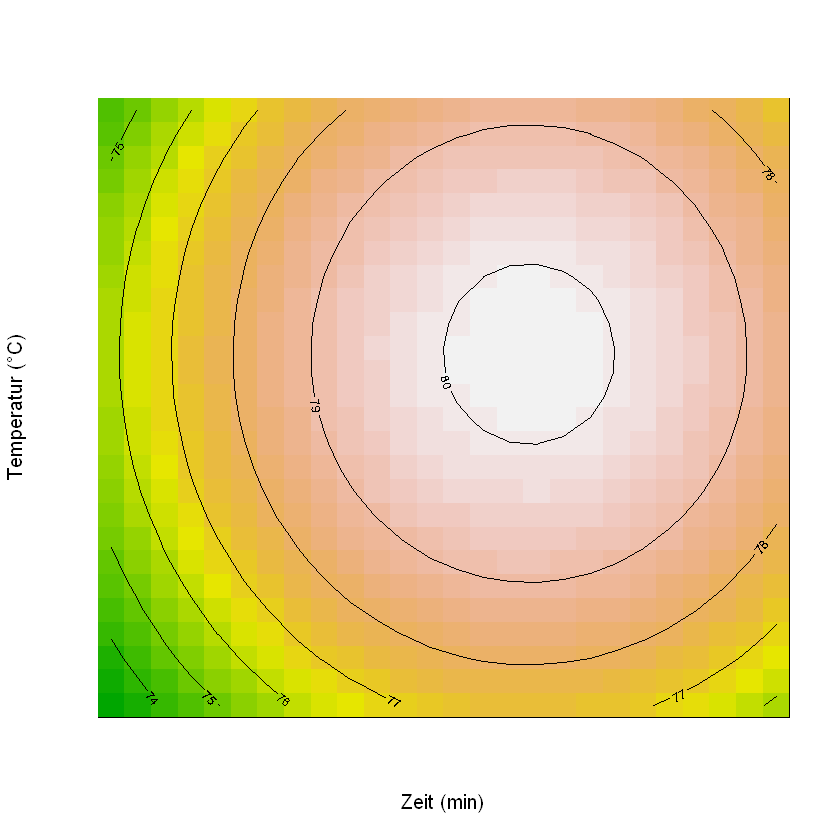

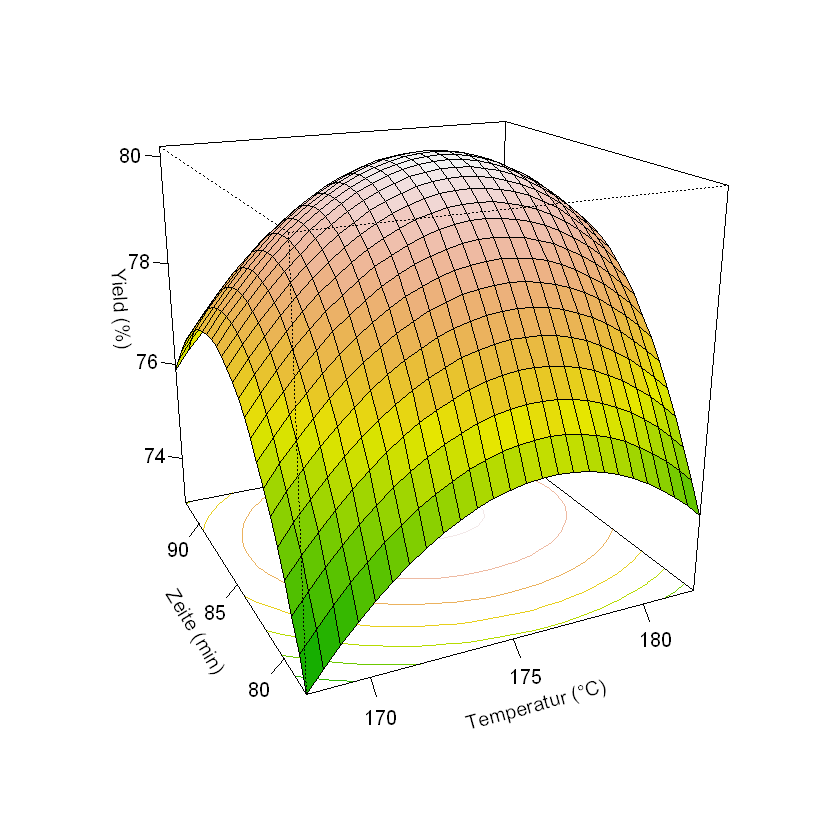

In [7]:
RSM <- as.coded.data(data, 
              x1 ~ (Time-85)/5,
              x2 ~ (Temp-175)/5) # Daten in Coded Units umwandelt. Dies braucht R zum berechnen
model <- rsm(Y ~ FO(x1, x2)+PQ(x1, x2), data = RSM) #SO = second order model. Dies beinhaltet FO, TWI und PQ = Quadratischer Anteil
summary(model) # Wiedergabge der Ergebnisse
contour(model, ~ x1+x2, 
        image = TRUE,
        xaxp=c(30,40,5),
        yaxp=c(150,160,2),
        xlabs=c("Zeit (min)", "Temperatur (°C)")
        )

#Darstellung als Response Surface
persp(model, x1~x2, col = terrain.colors(50), contours = "colors",
      zlab = "Yield (%)",
      xlabs=c("Zeite (min)", "Temperatur (°C)")
      )

## <center>Nun wissen wir, das Maximum liegt bei 86.80728 Minuten und 176.28629 °C <center>
# <center>Aber wie groß ist der Response (Auswirkung) an dieser Stelle?<center>
# <center>Wir benutzen den Befehl "predict"<center>

In [8]:
max <- data.frame(x1 = 0.361, x2 = 0.257) # Die x,x2 (coded Units) Werte für die Prognose kommen aus der Berechnung oben
predict(model, max)

1 
80.18606

## <center>Da Modell prognostiziert uns ein maximalen Response von 80,2% <center>

In [9]:
library(rsm)

# creates design with central points:
dsg <- cube(2, n0 = 5, randomize = FALSE)
colnames(dsg)[4]  <- "name"
#dsg$Zeit <- 5*x1 +85

print(dsg)


  run.order std.order x1.as.is x2.as.is
1         1         1       -1       -1
2         2         2        1       -1
3         3         3       -1        1
4         4         4        1        1
5         5         5        0        0
6         6         6        0        0
7         7         7        0        0
8         8         8        0        0
9         9         9        0        0

Data are stored in coded form using these coding formulas ...
x1 ~ x1.as.is
name ~ x2.as.is



Call:
lm(formula = y ~ P * T)

Residuals:
   1    2    3    4    5 
17.2 -4.3 -4.3 -4.3 -4.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  389.800      8.600  45.326   0.0140 *
P            134.000      9.615  13.936   0.0456 *
T             55.000      9.615   5.720   0.1102  
P:T           -3.500      9.615  -0.364   0.7778  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.23 on 1 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9825 
F-statistic: 75.69 on 3 and 1 DF,  p-value: 0.08425


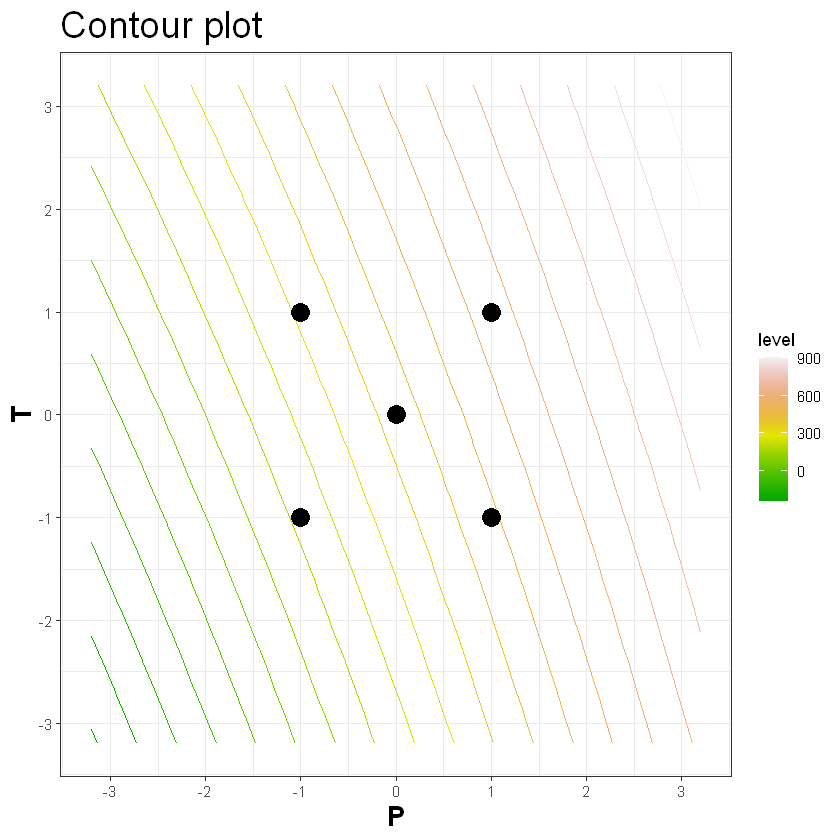

In [10]:
P <- c(  0,  -1,  +1,  -1,  +1)
T <- c(  0,  -1,  -1,  +1,  +1)
y <- c(407, 193, 468, 310, 571) #Auswirkung: nullpunkt,unten links,unten rechts,oben links,oben rechts
mod.base.1 <- lm(y ~ P*T)
summary(mod.base.1)
r=contourPlot(mod.base.1, "P", "T")


Call:
lm(formula = y ~ P * T)

Residuals:
   1    2    3    4    5 
19.2 -4.8 -4.8 -4.8 -4.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   660.30       9.60  68.781  0.00926 **
P              55.00      10.73   5.124  0.12269   
T              26.00      10.73   2.422  0.24924   
P:T            -3.50      10.73  -0.326  0.79932   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.47 on 1 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.8796 
F-statistic: 10.74 on 3 and 1 DF,  p-value: 0.2198


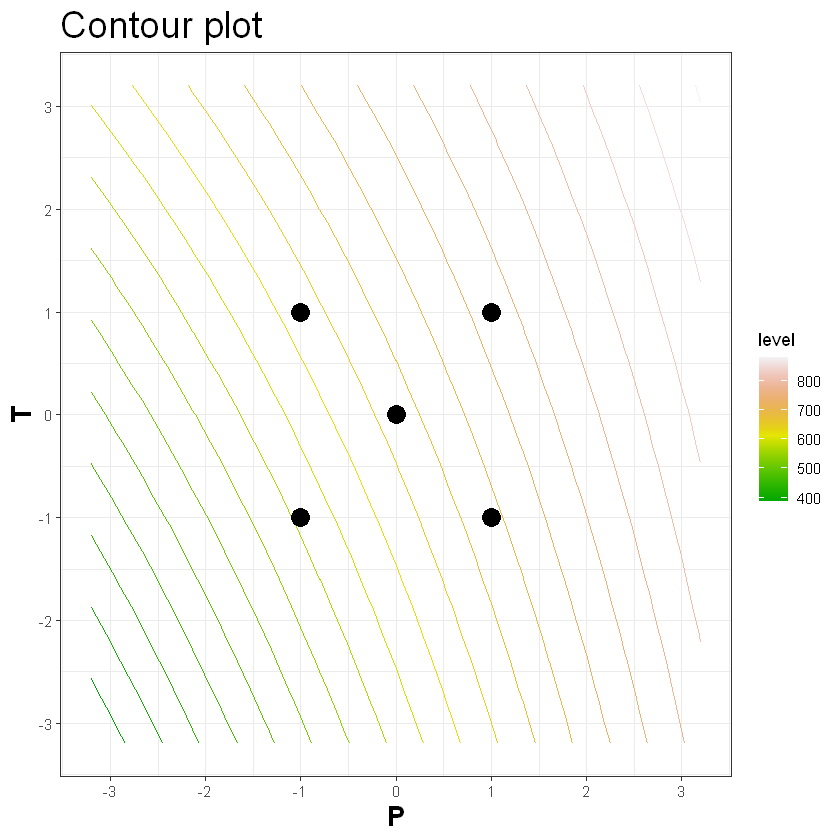

In [11]:
P <- c(  0,  -1,  +1,  -1,  +1)
T <- c(  0,  -1,  -1,  +1,  +1)
y <- c(679.5, 571, 688, 630, 733) #Auswirkung: nullpunkt,unten links,unten rechts,oben links,oben rechts
mod.base.1 <- lm(y ~ P*T)
summary(mod.base.1)
r=contourPlot(mod.base.1, "P", "T")